In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv('water_qualityfinalt.csv')

In [14]:
X = data.iloc[:,:-1].values
y = data['water_quality']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20, stratify=y)

In [15]:
clf = DecisionTreeClassifier()

In [16]:
#train train train
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
y_pred = clf.predict(X_test)

In [19]:
#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy *= 100
print(f'Accuracy: {accuracy:.2f}%')

#Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

#Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 96.00%
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.96      0.98        24
           2       0.98      0.94      0.96        51
           3       0.89      1.00      0.94        25

    accuracy                           0.96       100
   macro avg       0.96      0.97      0.96       100
weighted avg       0.96      0.96      0.96       100

Confusion Matrix:
 [[23  1  0]
 [ 0 48  3]
 [ 0  0 25]]


[Text(0.6666666666666666, 0.9, 'x[4] <= 400.558\ngini = 0.621\nsamples = 400\nvalue = [99.0, 203.0, 98.0]\nclass = Good'),
 Text(0.5, 0.7, 'x[4] <= 295.048\ngini = 0.439\nsamples = 301\nvalue = [0, 203, 98]\nclass = Good'),
 Text(0.5833333333333333, 0.8, 'True  '),
 Text(0.3333333333333333, 0.5, 'x[0] <= 6.994\ngini = 0.5\nsamples = 190\nvalue = [0.0, 92.0, 98.0]\nclass = Moderate'),
 Text(0.16666666666666666, 0.3, 'gini = 0.0\nsamples = 56\nvalue = [0, 56, 0]\nclass = Good'),
 Text(0.5, 0.3, 'x[1] <= 7.907\ngini = 0.393\nsamples = 134\nvalue = [0, 36, 98]\nclass = Moderate'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = Good'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 98\nvalue = [0, 0, 98]\nclass = Moderate'),
 Text(0.6666666666666666, 0.5, 'gini = 0.0\nsamples = 111\nvalue = [0, 111, 0]\nclass = Good'),
 Text(0.8333333333333334, 0.7, 'gini = 0.0\nsamples = 99\nvalue = [99, 0, 0]\nclass = Poor'),
 Text(0.75, 0.8, '  False')]

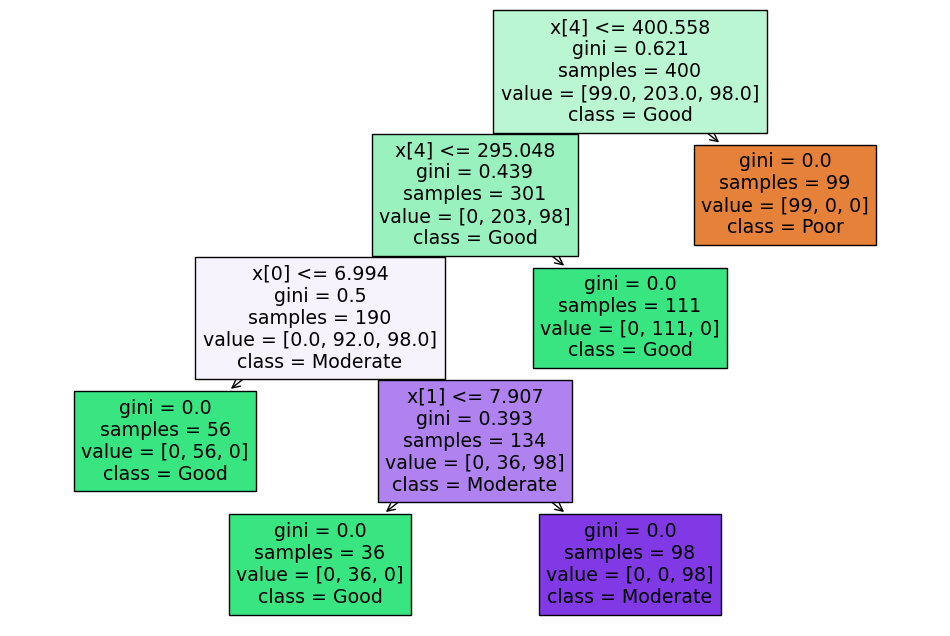

In [20]:
# Plot the Tree
plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, class_names=['Poor', 'Good', 'Moderate'])

In [21]:
from sklearn import tree

text_representation = tree.export_text(clf)

In [22]:
print(text_representation)

|--- feature_4 <= 400.56
|   |--- feature_4 <= 295.05
|   |   |--- feature_0 <= 6.99
|   |   |   |--- class: 2
|   |   |--- feature_0 >  6.99
|   |   |   |--- feature_1 <= 7.91
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  7.91
|   |   |   |   |--- class: 3
|   |--- feature_4 >  295.05
|   |   |--- class: 2
|--- feature_4 >  400.56
|   |--- class: 1

